In [344]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [345]:
car=pd.read_csv(r"C:\Users\Hp\Downloads\Car_price.csv")
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [346]:
car.info() # from this we can identify that whether there is null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [347]:
car.describe() # statistical analysis

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


##### In order to find the relationship of each column we use correlation to find it.

In [348]:
# here i am going to drop the categorical columns, because the correlation is possible only for numerical columns.
car1=car.drop(['CarName','fueltype','aspiration','doornumber','carbody',
              'drivewheel','enginelocation','enginetype','cylindernumber',
              'fuelsystem','car_ID','symboling'] ,axis='columns')
car1
# also dropping symboling and carId because its not relevent.

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


<Axes: >

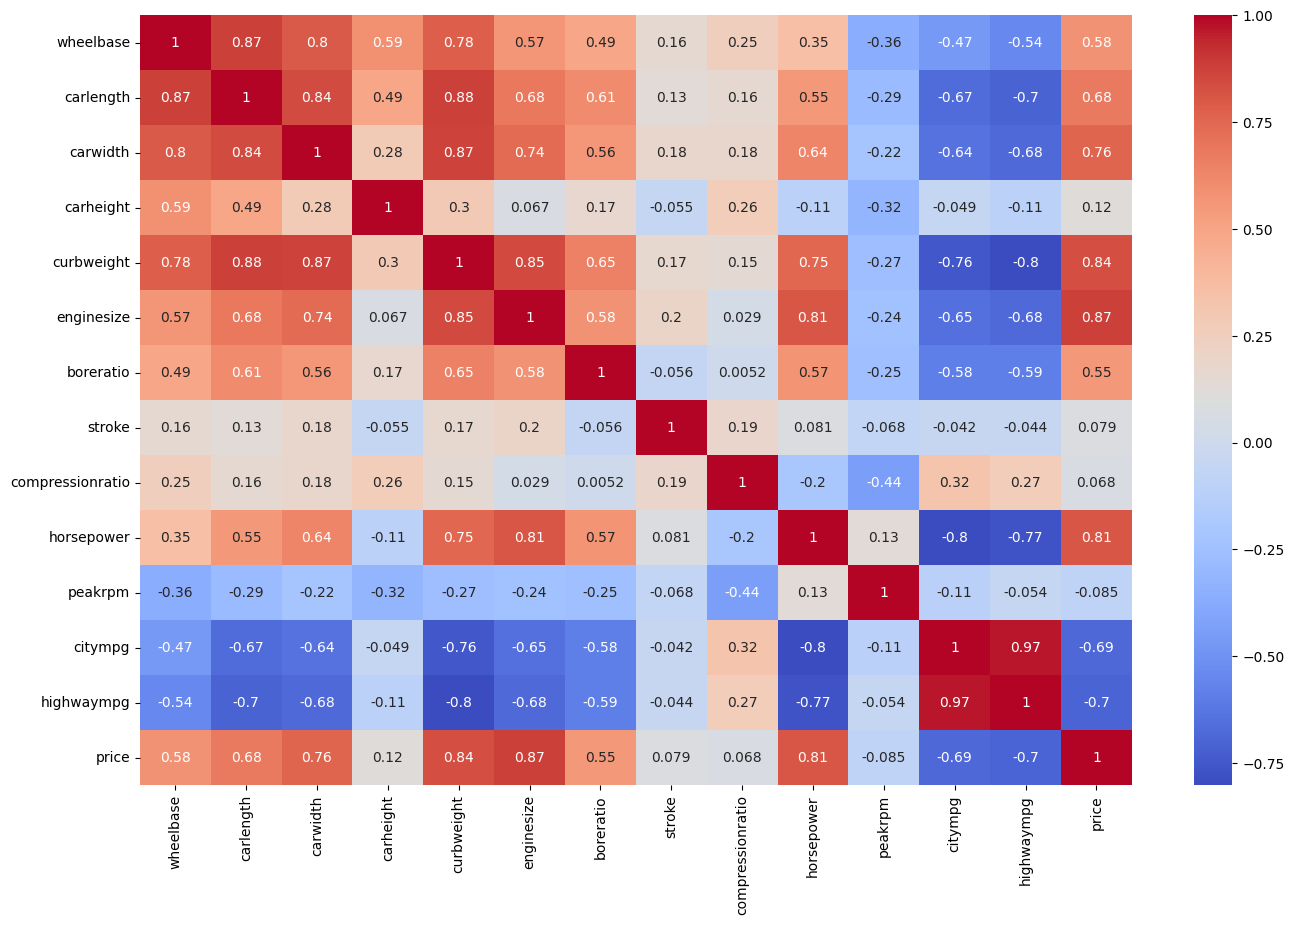

In [349]:
plt.figure(figsize = (16, 10))
corr=car1.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [350]:
# so from the above correlation ,price is dependent to wheelbase,carlength,carwidth,carheight,
# curbweight,enginesize,boreratio,stroke,horsepower because its having a positive correlation.
# And price is independent to citympg,peakrpm,highwaympg because its having a  negative correlation.

In [351]:
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [352]:

car['car_company_name']=car['CarName'].apply(lambda x:x.split()[0]) 
# here i am going to seperate the car_name because its shows a numerical part which i am going to omit as it is not necessary.

In [353]:
car.drop(['CarName'],axis='columns',inplace=True) # here inplace of car_name i put car_company_name

In [354]:
car

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company_name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [355]:
w=car['car_company_name'].value_counts()
w

car_company_name
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [356]:
# in the above list we can see that some car names are given incorrectly and short names. by using replace we can change the names

In [357]:
car['car_company_name'].replace('maxda','mazda',inplace=True)
car['car_company_name'].replace('Nissan','nissan',inplace=True)
car['car_company_name'].replace(['vokswagen','vw'],'volkswagen',inplace=True)
car['car_company_name'].replace('toyouta','toyota',inplace=True)

In [358]:
# here i used str.capitalize() to make the first letter of each company name in capital letter.
car['car_company_name']=car['car_company_name'].str.capitalize()
car['car_company_name']

0      Alfa-romero
1      Alfa-romero
2      Alfa-romero
3             Audi
4             Audi
          ...     
200          Volvo
201          Volvo
202          Volvo
203          Volvo
204          Volvo
Name: car_company_name, Length: 205, dtype: object

In [359]:
car['car_company_name'].replace('Bmw','BMW',inplace=True)
car['car_company_name'].value_counts()

car_company_name
Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Volkswagen     12
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
BMW             8
Audi            7
Plymouth        7
Saab            6
Isuzu           4
Porsche         4
Jaguar          3
Chevrolet       3
Alfa-romero     3
Renault         2
Mercury         1
Porcshce        1
Name: count, dtype: int64

In [360]:
columns=list(car.columns[car.dtypes=='float']) # another way to represent a particular dtypes.
columns

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'boreratio',
 'stroke',
 'compressionratio',
 'price']

<Axes: xlabel='price', ylabel='car_company_name'>

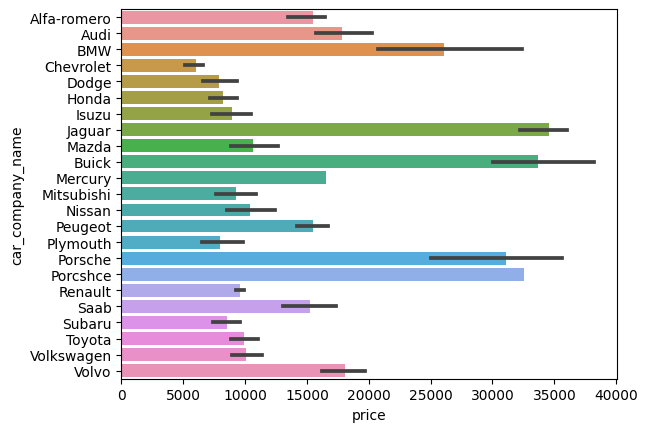

In [361]:
sns.barplot(y=car['car_company_name'],x=columns[-1],data=car) 
# here i put x as columns[-1] means i want to get compare car_company_name with price from above columns
# if i put x as columns[0] then i can compare car_Company_name with wheelbase column . similarly for the rest.

#### Data Preprocessing

In [362]:
dummies=list(car.columns[car.dtypes=='object'])
dummies

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_company_name']

In [363]:

import numpy as np
df_one_hot_encoded = pd.get_dummies(data = car, columns = dummies)

print(df_one_hot_encoded)

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio 

In [364]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = dummies
new_encoded_cols_names = []

for col in cols_to_encode:
    new_encoded_cols_names += [f"is_{category}" for category in car[col].unique().tolist()]

print(new_encoded_cols_names)


one_hot_encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoded_cols = one_hot_encoder.fit_transform(car[cols_to_encode])


df_encoded = pd.DataFrame(encoded_cols, columns = new_encoded_cols_names)
df_one_hot_encoded = car.join(df_encoded)

print(df_one_hot_encoded)

['is_gas', 'is_diesel', 'is_std', 'is_turbo', 'is_two', 'is_four', 'is_convertible', 'is_hatchback', 'is_sedan', 'is_wagon', 'is_hardtop', 'is_rwd', 'is_fwd', 'is_4wd', 'is_front', 'is_rear', 'is_dohc', 'is_ohcv', 'is_ohc', 'is_l', 'is_rotor', 'is_ohcf', 'is_dohcv', 'is_four', 'is_six', 'is_five', 'is_three', 'is_twelve', 'is_two', 'is_eight', 'is_mpfi', 'is_2bbl', 'is_mfi', 'is_1bbl', 'is_spfi', 'is_4bbl', 'is_idi', 'is_spdi', 'is_Alfa-romero', 'is_Audi', 'is_BMW', 'is_Chevrolet', 'is_Dodge', 'is_Honda', 'is_Isuzu', 'is_Jaguar', 'is_Mazda', 'is_Buick', 'is_Mercury', 'is_Mitsubishi', 'is_Nissan', 'is_Peugeot', 'is_Plymouth', 'is_Porsche', 'is_Porcshce', 'is_Renault', 'is_Saab', 'is_Subaru', 'is_Toyota', 'is_Volkswagen', 'is_Volvo']
     car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0         1          3      gas        std        two  convertible        rwd   
1         2          3      gas        std        two  convertible        rwd   
2         3    

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [365]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in car:
    car[i] = label_encoder.fit_transform(car[i])

In [366]:
car

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company_name
0,0,5,1,0,1,0,2,0,2,22,...,5,23,4,13,30,10,8,10,118,0
1,1,5,1,0,1,0,2,0,2,22,...,5,23,4,13,30,10,8,10,137,0
2,2,3,1,0,1,2,2,0,10,29,...,5,1,28,13,45,10,6,9,137,0
3,3,4,1,0,0,3,1,0,30,45,...,5,13,25,22,27,16,11,13,123,1
4,4,4,1,0,0,3,0,0,28,45,...,5,13,25,5,33,16,5,5,148,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,1,1,0,0,3,2,0,46,63,...,5,35,15,20,32,15,10,11,143,22
201,201,1,1,1,0,3,2,0,46,63,...,5,35,15,11,48,14,6,8,161,22
202,202,1,1,0,0,3,2,0,46,63,...,5,26,7,12,38,16,5,6,165,22
203,203,1,0,1,0,3,2,0,46,63,...,3,6,25,31,28,8,13,10,167,22


#### Modeling

In [367]:
x=car[['citympg','peakrpm','highwaympg']] # independent
y=car[['price']]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70)


In [368]:
x_train

,citympg,peakrpm,highwaympg
13,8,2,11
94,18,12,19
20,25,15,24
150,22,8,21
200,10,15,11
...,...,...,...
70,9,3,8
107,6,10,7
86,12,10,15
117,5,17,7


In [369]:
x_test

,citympg,peakrpm,highwaympg
93,18,12,19
92,18,12,19
63,23,6,23
149,10,8,6
189,11,16,12
...,...,...,...
32,25,16,23
72,3,7,2
190,11,16,12
139,13,4,14


In [370]:
reg=LinearRegression() #object creation


In [371]:
reg.fit(x_train,y_train)# fit function: we are giving training data set
#fit function implement the algorithm
# we build the model
#now we have to test

LinearRegression()

In [372]:
pred=reg.predict(x_test) # we have to give testing data with only x features
#

In [373]:
pred


array([[ 49.34169347],
       [ 49.34169347],
       [ 30.32954051],
       [151.23778304],
       [ 93.86561524],
       [ 86.47213404],
       [ 87.06884752],
       [101.26391599],
       [ 56.88857014],
       [201.94730005],
       [138.09238516],
       [ 79.37339492],
       [141.71604268],
       [ 49.34169347],
       [ 59.14612669],
       [107.29611575],
       [117.10054897],
       [123.74874077],
       [ 86.17257241],
       [ 86.7692859 ],
       [ 34.99804908],
       [ 88.74655935],
       [ 47.52745494],
       [ 56.58900851],
       [ 34.99804908],
       [127.22623213],
       [ 86.7692859 ],
       [ 85.87301078],
       [150.94063119],
       [ 49.34169347],
       [117.10054897],
       [ 68.22213926],
       [ 99.43521846],
       [108.36024533],
       [141.71604268],
       [ 54.3290422 ],
       [101.26391599],
       [141.71604268],
       [ 19.00802062],
       [152.88416711],
       [148.8147818 ],
       [129.78094053],
       [154.69599587],
       [116

In [374]:
# now we check the best fit line ,we want m and c values
# inorder to find the m and c we have two parameters

In [375]:
reg.coef_  #m

array([[-0.29956163, -1.81182876, -7.09632935]])

In [376]:
reg.intercept_ #c

array([211.30600549])

In [377]:
reg.coef_*28.0+reg.intercept_

array([[202.91827993, 160.57480017,  12.60878377]])

In [378]:
reg.predict([[11,16,13]])

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[86.7692859]])

In [379]:
reg.score(x_test,y_test) # evaluation measure 

0.6461911335973456

<Axes: xlabel='citympg'>

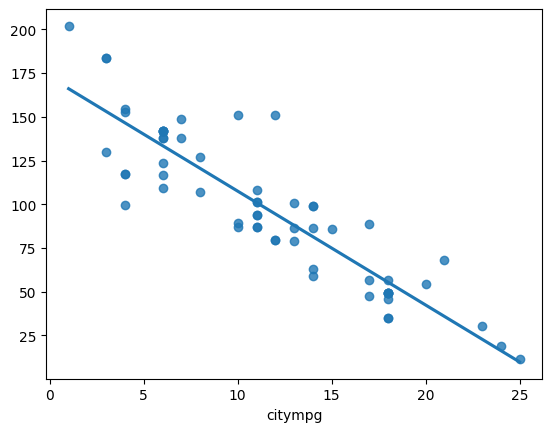

In [380]:
sns.regplot(data=car,x=x_test['citympg'],y=pred,ci=None)

<Axes: xlabel='peakrpm'>

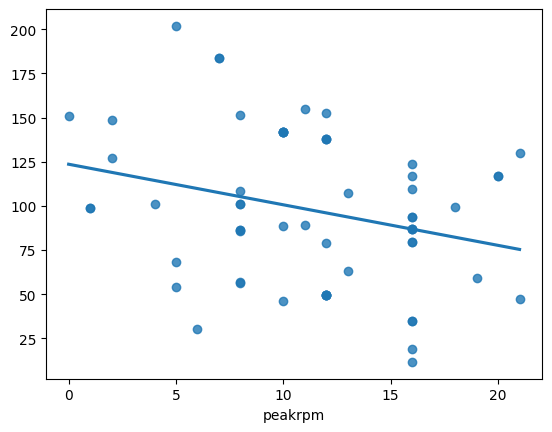

In [381]:
sns.regplot(data=car,x=x_test['peakrpm'],y=pred,ci=None)

<Axes: xlabel='highwaympg'>

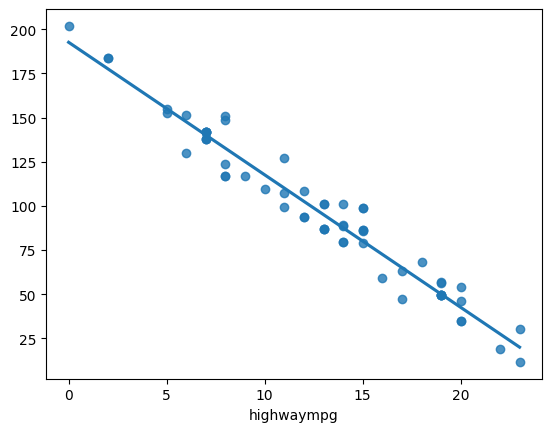

In [382]:
sns.regplot(data=car,x=x_test['highwaympg'],y=pred,ci=None)

In [383]:
# Evaluation
mse=mean_squared_error(y_test,pred)
mse


978.6622006895627

In [384]:
np.sqrt(mse)# rmse

31.283577172209107

In [385]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(reg,x,y,cv=5)
scores

array([0.84647131, 0.61973075, 0.69424735, 0.30684544, 0.33970632])

In [386]:
scores.mean()

0.561400233236353